# Coin Problem 
210503H-I.P.D.D.Rajapaksha

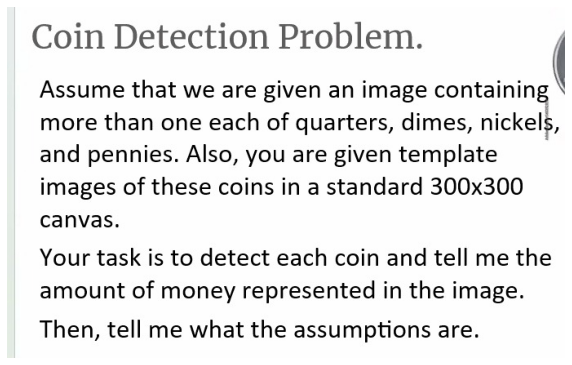

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image = cv.imread('Coins/problem.jpg')#problem image 
assert image is not None, "Image not found."

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

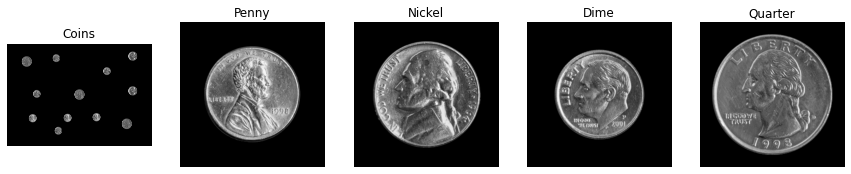

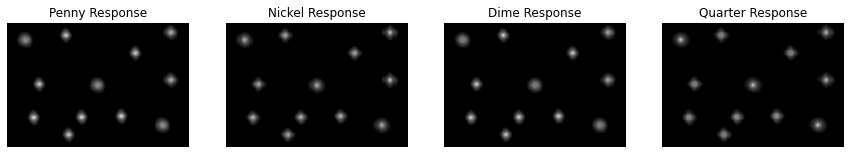

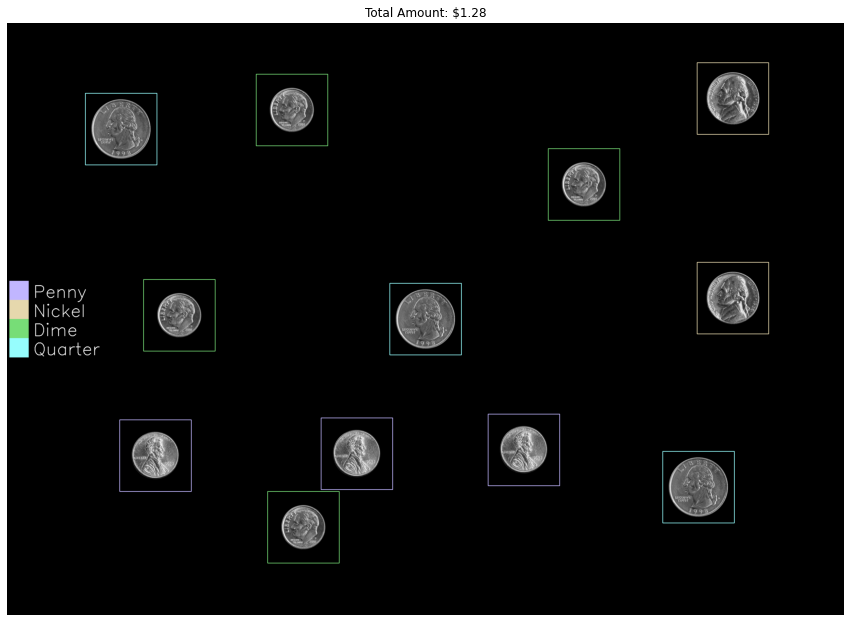

Total Amount: $1.28


In [8]:
import numpy as np
import cv2 as cv
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt

# Load images
coins = cv.imread("Coins/coins.png", cv.IMREAD_GRAYSCALE)
assert coins is not None
p = cv.imread("Coins/Penny.png", cv.IMREAD_GRAYSCALE)
assert p is not None
n = cv.imread("Coins/Nickel.png", cv.IMREAD_GRAYSCALE)
assert n is not None
d = cv.imread("Coins/Dime.png", cv.IMREAD_GRAYSCALE)
assert d is not None
q = cv.imread("Coins/Quarter.png", cv.IMREAD_GRAYSCALE)
assert q is not None

# Display loaded images
plt.figure(figsize=(15, 15))
plt.subplot(1, 5, 1)
plt.imshow(coins, cmap="gray")
plt.title("Coins")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(p, cmap="gray")
plt.title("Penny")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(n, cmap="gray")
plt.title("Nickel")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(d, cmap="gray")
plt.title("Dime")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(q, cmap="gray")
plt.title("Quarter")
plt.axis("off")

plt.show()

# Template matching
p_resp = cv.matchTemplate(coins, p, cv.TM_CCOEFF_NORMED)
n_resp = cv.matchTemplate(coins, n, cv.TM_CCOEFF_NORMED)
d_resp = cv.matchTemplate(coins, d, cv.TM_CCOEFF_NORMED)
q_resp = cv.matchTemplate(coins, q, cv.TM_CCOEFF_NORMED)

# Display template matching responses
plt.figure(figsize=(15, 15))
plt.subplot(1, 4, 1)
plt.imshow(p_resp, cmap="gray", vmin=0, vmax=1)
plt.title("Penny Response")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(n_resp, cmap="gray", vmin=0, vmax=1)
plt.title("Nickel Response")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(d_resp, cmap="gray", vmin=0, vmax=1)
plt.title("Dime Response")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(q_resp, cmap="gray", vmin=0, vmax=1)
plt.title("Quarter Response")
plt.axis("off")

plt.show()

stacked = np.stack([p_resp, n_resp, d_resp, q_resp], axis=2)

pastel_colors = [
    (255, 182, 193),
    (173, 216, 230),  
    (119, 221, 119),  
    (253, 253, 150)   
]

coins_color = cv.cvtColor(coins, cv.COLOR_GRAY2BGR)

# Find the local maxima in the stacked responses
coordinates = peak_local_max(stacked, exclude_border=0, min_distance=5, threshold_abs=0.8)
# print(coordinates)
# Calculate mean intensities of the template images
mean_intensity_p = np.mean(p)
mean_intensity_n = np.mean(n)
mean_intensity_d = np.mean(d)
mean_intensity_q = np.mean(q)

# Define intensity thresholds
intensity_thresholds = [
    (mean_intensity_p + mean_intensity_d) / 2,  # Between Penny and Dime
    (mean_intensity_n + mean_intensity_q) / 2   # Between Nickel and Quarter
]

coin_values = [0.01, 0.05, 0.10, 0.25]
total_amount = 0

for coord in coordinates:
    y, x, c = coord
    h, w = [p.shape, n.shape, d.shape, q.shape][c][:2]
    region = coins[y:y+h, x:x+w]
    intensity = np.mean(region)
    # print(intensity)
    # print(coord[2])

    #Since Penny and Dime intensity and the nickel and  Quarter intensity are very similar compare between them 
    if c == 0:  # Penny
        if intensity > intensity_thresholds[0]:
            coin_idx = 0  # Penny
        else:
            coin_idx = 2  # Dime
    elif c == 1:  # Nickel
        if intensity > intensity_thresholds[1]:
            coin_idx = 3  # Quarter
        else:
            coin_idx = 1  # Nickel
    else:
        coin_idx = c
    
    total_amount += coin_values[coin_idx]
    cv.rectangle(coins_color, (x, y), (x + w, y + h), pastel_colors[coin_idx], 2)


template_names = ["Penny", "Nickel", "Dime", "Quarter"]
legend_scale = 0.8
rectangle_size = 100  # Width and height of the rectangles (pixels)
legend_height = int(len(template_names) * rectangle_size * legend_scale)
start_y = (coins_color.shape[0] - legend_height) // 2

for i, (name, color) in enumerate(zip(template_names, pastel_colors)):
    scaled_font_scale = legend_scale * 3
    rect_top_left = (10, start_y + int(rectangle_size * legend_scale * i))
    rect_bottom_right = (10 + int(rectangle_size * legend_scale), start_y + int(rectangle_size * legend_scale + rectangle_size * legend_scale * i))
    cv.rectangle(coins_color, rect_top_left, rect_bottom_right, color=color, thickness=-1)
    text_x = 30 + int(rectangle_size * legend_scale)
    text_y = start_y + int(rectangle_size * legend_scale + 0.5 * rectangle_size * legend_scale * (2 * i + 1)) - int(rectangle_size/2)
    cv.putText(coins_color, name, (text_x, text_y), fontFace=cv.FONT_HERSHEY_SIMPLEX, fontScale=scaled_font_scale, color=(255, 255, 255), thickness=2, lineType=cv.LINE_AA)


plt.figure(figsize=(15, 15))
plt.imshow(cv.cvtColor(coins_color, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Total Amount: ${total_amount:.2f}")
plt.show()

print(f"Total Amount: ${total_amount:.2f}")


# Assumptions

- The coins in the input image are assumed to be clearly visible and non-overlapping.
- The threshold parameter set to 0.8 assumes that only the peaks with values exceeding this threshold are considered valid detections.
- Penny and Dime intensity and the nickel and  Quarter intensity are very similar compare between them. 
- The intensity values of the coins are assumed to be consistent and distinguishable based on their mean intensities.
- The intensity thresholds used to distinguish between similar coins (e.g., between penny and dime, and between nickel and quarter) are assumed to be appropriate for the given images.